In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

data = pd.read_csv('creditcard.csv')

print 'done'

done


In [4]:
print data.head()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

In [5]:
data1 = np.array(data)


x = data1[:,0:30]
y = data1[:,30]
print x.shape
print y.shape


(284807, 30)
(284807,)


# 2 component PCA visualisation

In [6]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
# summarize components
# print("Explained Variance: %s") % fit.explained_variance_ratio_
# print fit.explained_variance_
# print fit.explained_variance_ratio_*100
# print pc
pc_value = pd.DataFrame(data = pc, columns=['pc1', 'pc2'])
print pc_value.head()

            pc1         pc2
0  94813.862881   55.979467
1  94813.854640  -90.953660
2  94812.875662  285.024840
3  94812.861396   29.859853
4  94811.858408  -23.652028


In [7]:
pc_final = pd.concat([pc_value, data[['Class']]], axis=1)
print pc_final.head()

            pc1         pc2  Class
0  94813.862881   55.979467      0
1  94813.854640  -90.953660      0
2  94812.875662  285.024840      0
3  94812.861396   29.859853      0
4  94811.858408  -23.652028      0


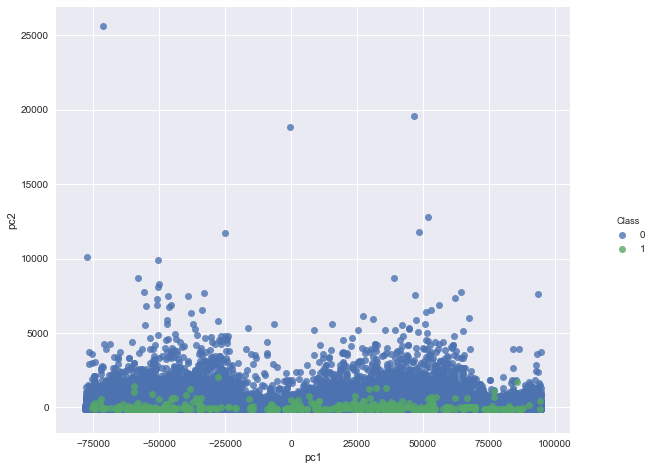

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot('pc1', 'pc2', pc_final, hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()


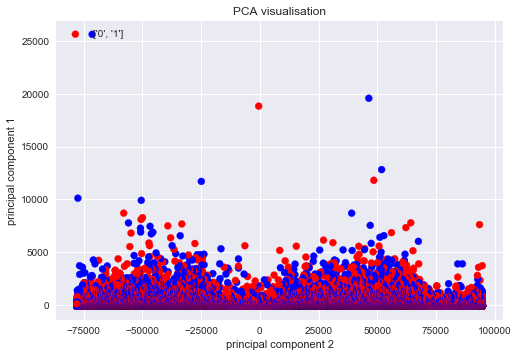

In [10]:
color = ['r', 'b']#g
labels = ['0', '1']
plt.scatter(pc_final['pc1'], pc_final['pc2'], c=color, label=labels)
plt.legend(loc=2)
plt.title('PCA visualisation')
plt.ylabel('principal component 1')
plt.xlabel('principal component 2')
plt.show()

In [20]:
import matplotlib.pyplot as plt
# fig = plt.figure
# ax=plt.

label = ['1', '0']
color = ['b', 'r']

for target, color in zip(label, color):
    index = target#1#pc_final['Class'] == label
    
    plt.scatter(pc_final.loc[index, 'pc1'], pc_final.loc[index, 'pc2'], s=40, c=color)
plt.legend(label)
plt.show()

KeyError: u'the label [1] is not in the [index]'

In [13]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
data = np.array(data)

x = data[:,0:30]
y = data[:,30]
print x.shape
print y.shape

# feature extraction
model = ExtraTreesClassifier()
model.fit(x, y)
print (model.feature_importances_)*100

(284807, 30)
(284807,)
[ 1.51420775  1.39755659  1.06923561  4.42536243  3.38046124  0.77511126
  1.19621826  1.77104785  1.6877758   4.21838687  4.12647131  9.86482838
 17.32267715  0.92396126  7.65933594  1.23122596  5.28707815 12.5182839
  6.50134169  1.08428838  1.39469614  1.36089466  1.36262566  0.92281543
  1.19954913  1.13148656  1.16563474  1.3249883   1.00683704  1.17561658]


In [24]:
# Feature Extraction with PCA

from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(x)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print fit.explained_variance_
print fit.explained_variance_ratio_*100
# print(fit.components_)

Explained Variance: [9.99972249e-01 2.77382192e-05 1.64251868e-09 1.06655916e-09
 8.88775074e-10]
[2.25512401e+09 6.25548602e+04 3.70418611e+00 2.40528991e+00
 2.00435364e+00]
[9.99972249e+01 2.77382192e-03 1.64251868e-07 1.06655916e-07
 8.88775074e-08]


In [23]:
# Feature Extraction with RFE
# recursive feature elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(x, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 5
Selected Features: [False False False False  True False False False False False  True False
 False False  True False False False False False False  True  True False
 False False False False False False]
Feature Ranking: [26 16 17 21  1 11 14 18  4  6  1 22 20  2  1 13  3 23 24 15  8  1  1  7
 10 12 19  5  9 25]


In [28]:
# not working as data matrix are negetive
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(x, y)

# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
print features[0:6,:] 

ValueError: Input X must be non-negative.